In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [5]:
wine = load_wine()
#wine

In [6]:
wine.data.shape

(178, 13)

In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [26]:
#random_state=30随机数种子，稳定模型长出同一颗树，高维度表现更明显
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=0
                                  ,splitter="random"
                                 )
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)#准确度
score

1.0

In [15]:
score

0.9074074074074074

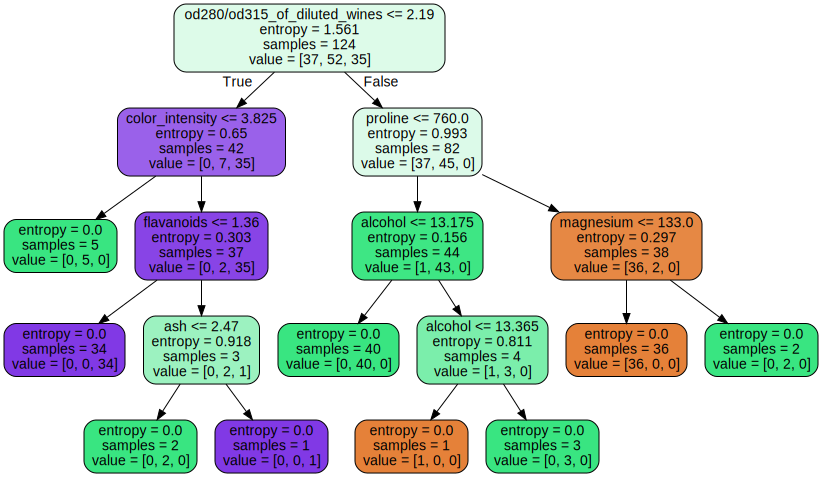

In [21]:
import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names=wine.feature_names
                                ,filled=True#颜色
                                ,rounded=True#形状
                                )
graph = graphviz.Source(dot_data)
graph

In [22]:
clf.feature_importances_

array([0.03556196, 0.        , 0.01422812, 0.        , 0.05838127,
       0.        , 0.04374475, 0.        , 0.        , 0.08302779,
       0.        , 0.43840785, 0.32664825])

In [23]:
[*zip(wine.feature_names,clf.feature_importances_)]

[('alcohol', 0.035561963124737854),
 ('malic_acid', 0.0),
 ('ash', 0.014228115410563381),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.058381273448773),
 ('total_phenols', 0.0),
 ('flavanoids', 0.04374475301074696),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.08302778919209487),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.43840785332872084),
 ('proline', 0.32664825248436313)]

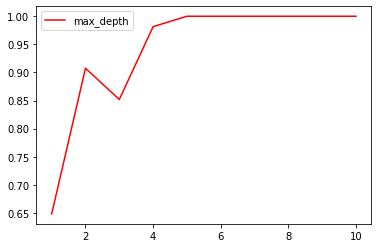

In [28]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                      ,criterion="entropy"
                                      ,random_state=0
                                      ,splitter="random"
                                     )
    clf = clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)#准确度
    test.append(score)
plt.plot(range(1,11),test,color="r",label="max_depth")
plt.legend()
plt.show()

In [29]:
#返回所在节点
clf.apply(Xtest)

array([15,  3,  3, 24, 20, 15, 11, 13, 24, 11,  3, 24,  3, 15, 11, 24,  3,
       24,  7, 24,  3, 24, 24, 24, 13, 15,  7,  7, 13, 24, 24, 24,  3, 15,
        3, 24, 11, 20, 15, 15, 24, 24, 20, 24, 24, 24, 24,  7,  9, 10, 13,
       11,  9, 17], dtype=int64)

In [30]:
#返回结果
clf.predict(Xtest)

array([1, 2, 2, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 2, 1, 1, 1, 1])